In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time
import seaborn as sns
%matplotlib inline

## Data loading and Preprocessing

In this assignment we use a dataset (`data.csv`) to diagnose breast cancer as malignant (`M`) or benign (`B`):

- Load the dataset and show the first 5 rows
- Remove `id` from the dataframe
- Remove rows with any null values
- Seperate the target variable `diagnosis` and feature matrix.
* Use label encoder to make the labels numerical (0 and 1 instead of `B` and `M`).
* Split the data and set aside 10 percent of data for testing.
* Print the size of training and test sets.

In [2]:
df = pd.read_csv('data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# data.info()
df = df.dropna()

df.drop(['id'], axis= 1, inplace= True)

y = df.diagnosis
X = df.drop('diagnosis', axis = 'columns')

# 'y' is your target variable with 'B' and 'M' classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will transform 'B' -> 0 and 'M' -> 1

# Random state assures that folds are consistent across models
X_train, X_test, ytrain, ytest = train_test_split(X,
                                                y_encoded, 
                                                test_size =0.10, random_state=42)

print(X_train.shape,X_test.shape)

(512, 30) (57, 30)


## Q2: Effect of normalization

In order to properly build ML models, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. 

* Standarize training and test sets and plot the `area_mean` feature before and after the standardization. 
 

C:\Users\Piran\AppData\Local\Temp\ipykernel_10460\1033046155.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train.area_mean,
C:\Users\Piran\AppData\Local\Temp\ipykernel_10460\1033046155.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Xtrain[:, X.columns.get_loc("area_mean")

[Text(0.5, 0, 'area_mean'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'After Standardization')]

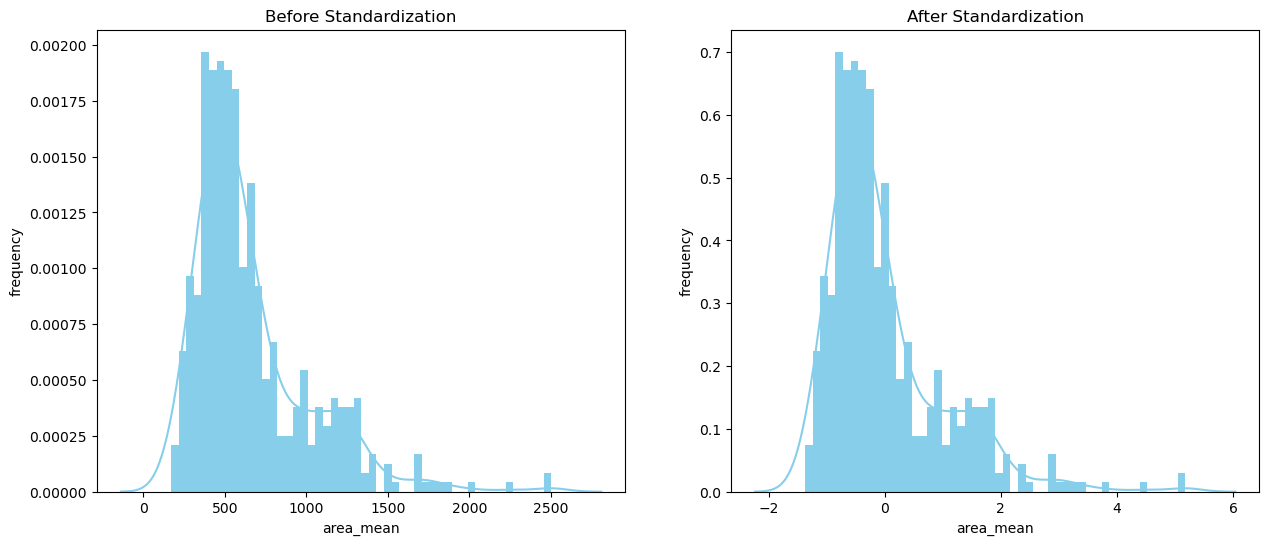

In [4]:
standardizer_step = StandardScaler()
Xtrain = standardizer_step.fit_transform(X_train)
Xtest = standardizer_step.transform(X_test)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
ax = sns.distplot(X_train.area_mean,
                 bins=50,
                 kde=True,
                 color='skyblue',
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='area_mean', ylabel='frequency', title="Before Standardization")
plt.subplot(1, 2, 2)
ax = sns.distplot(Xtrain[:, X.columns.get_loc("area_mean")],
                 bins=50,
                 kde=True,
                 color='skyblue',
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='area_mean', ylabel='frequency', title="After Standardization")

After standardization, the data is observed to be more centered and most data points are around 0 representing the mean and concentrated within one std from the mean.

## lassification model1

* Fit a logistic regression model (model1) to the normalized training data and report the training time.
* Report the accuracy and recall for model1's predictions. 

In [5]:
# Fit logistic regression to the training data
model1 = LogisticRegression()
t1 = time.time()
model1.fit(Xtrain, ytrain)
t2 = time.time()
print("Training time of model1: "+str(t2-t1)+" s")

# Predict on the test set
y_pred = model1.predict(Xtest)

# Report accuracy and recall
accuracy = accuracy_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
print(f"model1 Accuracy: {accuracy}")
print(f"model1 Recall: {recall}")


Training time of model1: 0.038225650787353516 s
model1 Accuracy: 0.9824561403508771
model1 Recall: 0.9411764705882353


## PCA

In this task:

- Use the normalized training data and plot the explained variance ratio for the data.
- **Written Answer** Use that plot to choose the proper number of principal components (PCs) which can explain at least 70% of the total variance in the training data. Report the number of your choice and explain how you have chosen that number?

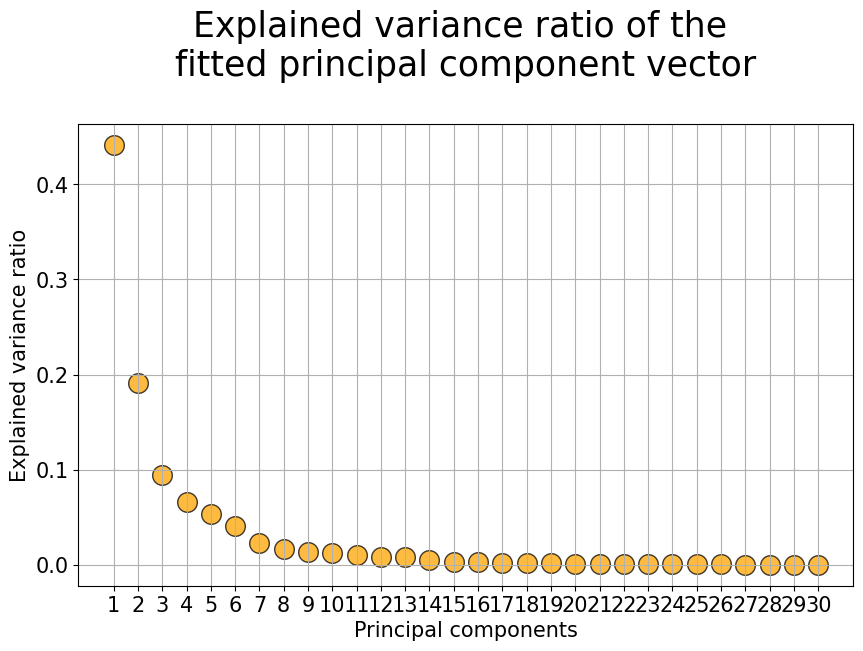

Optimum Number of Components 2


In [6]:
pca = PCA(n_components=None)
X_pca = pca.fit(Xtrain)

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_pca.explained_variance_ratio_))],
            y=X_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()



# to find principal component which is taken greather than 95 %
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4) * 100)
Num_components = var<=70
print("Optimum Number of Components",Num_components.sum())


The above plot means that the first two principal components can explain at least 70% of the total variance in the data.

## Dimensionality Reduction

* Project the scaled training data using PCA with the dimension of 2. 
* Plot the projected training dataponts on the PCs and show different labels with two different colors. 

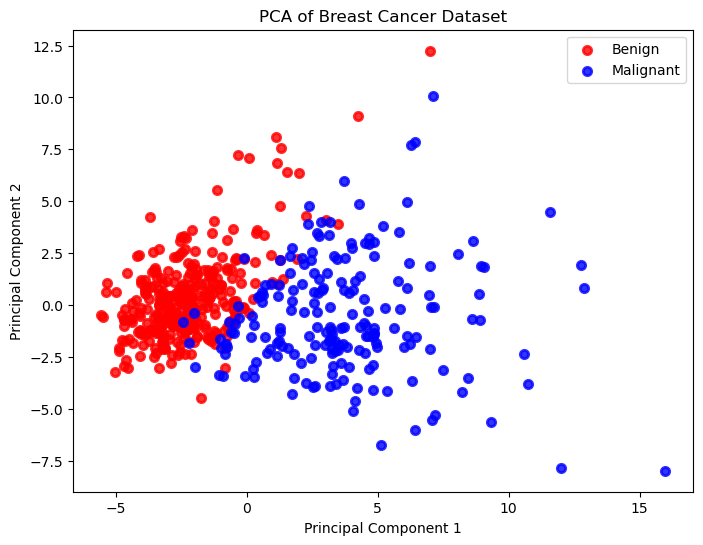

In [7]:
pca = PCA(n_components=2)
Xtrain_pca = pca.fit_transform(Xtrain)
    
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']  # Red for Benign, blue for Malignant
lw = 2

for color, i, target_name in zip(colors, [0, 1], ['Benign', 'Malignant']):
    plt.scatter(Xtrain_pca[ytrain == i, 0], Xtrain_pca[ytrain == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Classification model2

* Fit a new logistic regression model (model2) and fit it to the compressed training data from Q5 and report the training time.
* Project the normalized test set using PCA model you created in Q5 and report the accuracy and recall for model2's prediction. 

In [8]:
# Apply the transformation to the test set
Xtest_pca = pca.transform(Xtest)

# Fit logistic regression to the training data
model2 = LogisticRegression()
t1 = time.time()
model2.fit(Xtrain_pca, ytrain)
t2 = time.time()
print("Training time of model2: "+str(t2-t1)+" s")

# Predict on the test set
y_pred = model2.predict(Xtest_pca)

# Report accuracy and recall
accuracy = accuracy_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
print(f"model2 Accuracy: {accuracy}")
print(f"model2 Recall: {recall}")

Training time of model2: 0.009196996688842773 s
model2 Accuracy: 0.9824561403508771
model2 Recall: 0.9411764705882353


The performance of the model2 (PCA + LR model) is similar to model1 (LR model). It means by compressing the training data not only the performance was not affected, but also we could reduce the raining time slightly, which is beneficial. This shows the advantage of dimensionality reduction. 